In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

1.Import the HousePrice dataset and display its first 10 rows

In [40]:
df = pd.read_csv("HousePrice.csv")
print(df.head(10))

          date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  5/2/14 0:00         3       1.50         1340      7912     1.5   
1  5/2/14 0:00         5       2.50         3650      9050     2.0   
2  5/2/14 0:00         3       2.00         1930     11947     1.0   
3  5/2/14 0:00         3       2.25         2000      8030     1.0   
4  5/2/14 0:00         4       2.50         1940     10500     1.0   
5  5/2/14 0:00         2       1.00          880      6380     1.0   
6  5/2/14 0:00         2       2.00         1350      2560     1.0   
7  5/2/14 0:00         4       2.50         2710     35868     2.0   
8  5/2/14 0:00         3       2.50         2430     88426     1.0   
9  5/2/14 0:00         4       2.00         1520      6200     1.5   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0           0     0          3        1340              0      1955   
1           0     4          5        3370            280      1921   
2           0   

2.Summarize the dataset by calculating the minimum, maximum, mean, and standard
deviation for bedrooms,sqft living, sqft lot, sqft above, floors,
SalesPrice. 

In [41]:
cols = ["bedrooms", "sqft_living", "sqft_lot", "sqft_above", "floors", "SalesPrice"]

summary = df[cols].agg(["min", "max", "mean", "std"]).T  #T for acting it as a columns 
print("Summary statistics")
print(summary, "\n")


Summary statistics
               min         max           mean            std
bedrooms       0.0         9.0       3.400870       0.908848
sqft_living  370.0     13540.0    2139.346957     963.206916
sqft_lot     638.0   1074218.0   14852.516087   35884.436145
sqft_above   370.0      9410.0    1827.265435     862.168977
floors         1.0         3.5       1.512065       0.538288
SalesPrice     0.0  26590000.0  551962.988473  563834.702547 



3.Present a box plot for SalesPrice. Based on the box plot, calculate the IQR and
compute the percentage of the population within IQR.

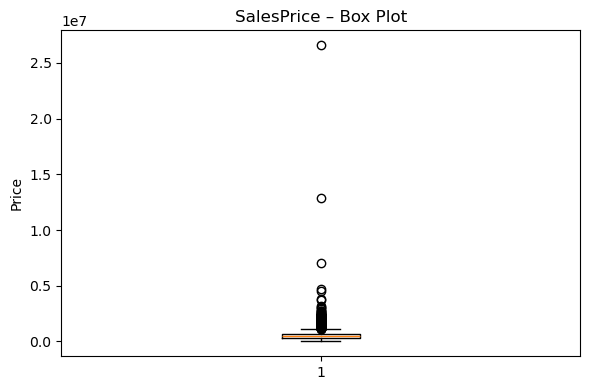

IQR:  $332,087.50
Percentage of homes within IQR: 50.00%



In [42]:
plt.figure(figsize=(6,4))
plt.boxplot(df["SalesPrice"], vert=True)
plt.title("SalesPrice – Box Plot")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

Q1, Q3 = df["SalesPrice"].quantile([0.25, 0.75])
IQR = Q3 - Q1
pct_iqr = (df[(df["SalesPrice"] >= Q1) & (df["SalesPrice"] <= Q3)].shape[0]
           / len(df) * 100)
print(f"IQR:  ${IQR:,.2f}")
print(f"Percentage of homes within IQR: {pct_iqr:.2f}%\n")

Linear Regression (Single Variable

Y = mX+c

for unit change in X -> how much change in Y  => determines slope (m)


slope = (sum(x-xmean)*(y-ymean)) / sum(x-x_mean)square


1. Implement linear regression manually using sqft living as the independent variable and SalesPrice as the target. Calculate and print the coefficient (slope) and intercept.

In [43]:
x =  df["sqft_living"].values
y = df["SalesPrice"].values
x_mean, y_mean = x.mean(), y.mean()

slope_manual = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
intercept_manual = y_mean - slope_manual * x_mean
y_pred = slope_manual * x + intercept_manual


print("Manual Linear Regression")
print(f"  slope(coefficient): {slope_manual:.4f}  ($ per ft²)")
print(f"  intercept         : {intercept_manual:,.2f}  ($)")


Manual Linear Regression
  slope(coefficient): 251.9501  ($ per ft²)
  intercept         : 12,954.24  ($)


2. Compute the Root Mean Squared Errors (RMSE) and R-Squared Error for your
manually implemented model.

In [44]:
rmse_manual = np.sqrt(mean_squared_error(y, y_pred))
r2_manual = r2_score(y, y_pred)
print("Manual")
print(f"Root Mean Squared Errors : {rmse_manual}, R-Squared Error  : {r2_manual} " )

Manual
Root Mean Squared Errors : 508880.76092834957, R-Squared Error  : 0.18525278999306571 


In [45]:
equation = f"y = {slope_manual:.2f}x + {intercept_manual:.2f}"
equation

'y = 251.95x + 12954.24'

plot scatterplot for salesprice (y or target) and sqft (x or independent variable)

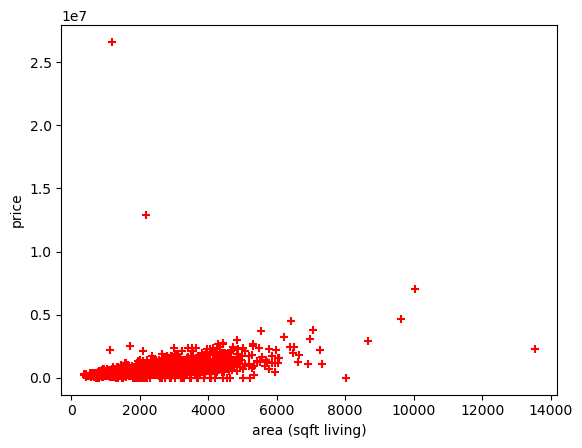

In [46]:
plt.xlabel('area (sqft living)')
plt.ylabel('price')
plt.scatter(df.sqft_living,df.SalesPrice , color= 'red',marker ='+')
plt.show()

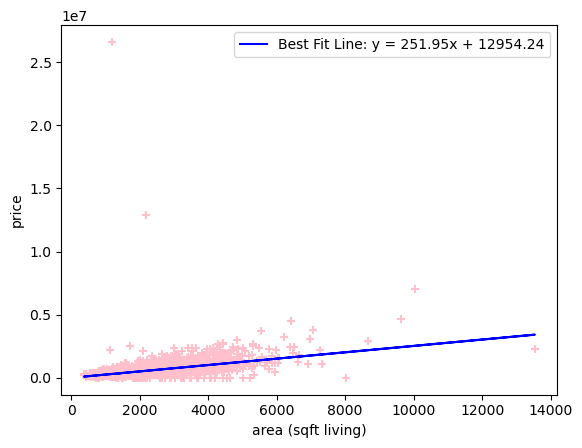

In [47]:
plt.xlabel('area (sqft living)')
plt.ylabel('price')
plt.scatter(df.sqft_living,df.SalesPrice , color= 'pink',marker ='+')
plt.plot(df.sqft_living,y_pred,color ='blue', label=f"Best Fit Line: {equation}")
plt.legend()
plt.show()

3.Use the LinearRegression class from sklearn.linear model to perform linear regression with sqft living as the independent variable. Compare the coefficient, intercept,
and r-squared error with your manual implementation.

Best fit line  and regression model using LinearRegression for Sqft_living vs SalesPrice

In [48]:
regression = LinearRegression()
regression.fit(df[['sqft_living']],df.SalesPrice)

LinearRegression()

In [49]:
print("sklearn Single‑Variable Regression")
print(f"  slope(coeffienct)       : {regression.coef_[0]:.4f}  ($ per ft²)")
print(f"  intercept               : {regression.intercept_:,.2f} ($)" )
print(f"  Root Mean Squared Errors: {np.sqrt(mean_squared_error(y,y_pred)):,.2f}")
print(f"  R-Squared Error         : {regression.score(x.reshape(-1,1), y):.4f}\n")

sklearn Single‑Variable Regression
  slope(coeffienct)       : 251.9501  ($ per ft²)
  intercept               : 12,954.24 ($)
  Root Mean Squared Errors: 508,880.76
  R-Squared Error         : 0.1853



/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
print("Manual Single‑Variable Regression")
print(f"  slope  manual    : {slope_manual:.4f}  ($ per ft²)")
print(f"  intercept manual  : {intercept_manual:,.2f}  ($)")
print(f"  RMSE Manual     : {rmse_manual:,.2f}")
print(f"  R²   Manual     : {r2_manual:.4f}\n")

Manual Single‑Variable Regression
  slope  manual    : 251.9501  ($ per ft²)
  intercept manual  : 12,954.24  ($)
  RMSE Manual     : 508,880.76
  R²   Manual     : 0.1853



In [51]:
input = pd.read_csv("sqft_living.csv")
input.head(3)


,sqft_living
0,45
1,35
2,465


In [52]:
x_input=500
y_pred_model = regression.predict(np.array(x_input).reshape(1, -1))
y_pred_model

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([138929.30792591])

In [53]:
predicted_price = regression.predict(input)

In [54]:
input["SalesPrice"] = predicted_price

In [55]:
input.head()

,sqft_living,SalesPrice
0,45,24291.998294
1,35,21772.496983
2,465,130111.053339
3,58,27567.349998
4,546,150519.013955


In [56]:
input.to_csv("predicted_values.csv",index=False)

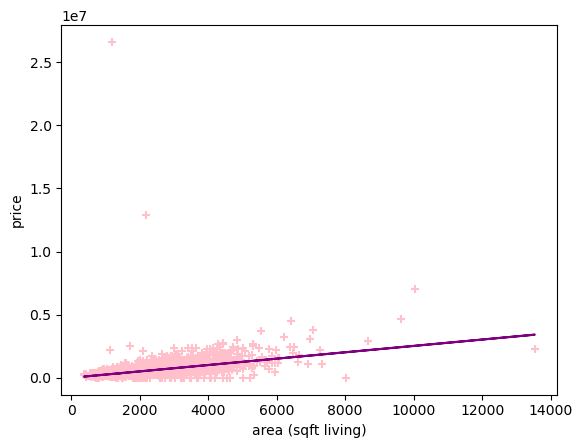

In [57]:
plt.xlabel('area (sqft living)')
plt.ylabel('price')
plt.scatter(df.sqft_living,df.SalesPrice , color= 'pink',marker ='+')
plt.plot(df.sqft_living,regression.predict(df[['sqft_living']]),color ='purple')
plt.show()

Linear Regression (Multivariate)

1. Manually implement multivariate linear regression using the features sqft basement
and sqft living. Compute and print the coefficients, intercept, and R-squared (R²)
score. Do not use any built-in regression functions from libraries like sklearn.


In [58]:
features = ["sqft_basement", "sqft_living"]
X = df[features].values

In [59]:
X_b = np.c_[np.ones((len(X), 1)), X]      # add intercept term
beta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
y_pred_multi = X_b @ beta

intercept_m, coef_base, coef_liv = beta
rmse_m = np.sqrt(mean_squared_error(y, y_pred_multi))
r2_m = r2_score(y, y_pred_multi)

print("Manual Multivariate Regression")
print(f"  intercept          : {intercept_m:,.2f}")
print(f"  coef sqft_basement : {coef_base:.4f}")
print(f"  coef sqft_living   : {coef_liv:.4f}")
print(f"  RMSE               : {rmse_m:,.2f}")
print(f"  R²                 : {r2_m:.4f}\n")


Manual Multivariate Regression
  intercept          : 17,012.54
  coef sqft_basement : 27.2490
  coef sqft_living   : 246.0781
  RMSE               : 508,755.04
  R²                 : 0.1857



2. Use the Linear Regression function from sklearn.linear model library to include
multiple features sqft basement, sqft living and print the coefficient, intercept,
R-squared score.

In [60]:
linreg_multi_var= LinearRegression().fit(X, y)
print("sklearn Multivariate Regression")
print(f"  intercept          : {linreg_multi_var.intercept_:,.2f}")
print(f"  coefficients       : {dict(zip(features, linreg_multi_var.coef_))}")
print(f"  R²                 : {linreg_multi_var.score(X, y):.4f}\n")

sklearn Multivariate Regression
  intercept          : 17,012.54
  coefficients       : {'sqft_basement': 27.24900919763049, 'sqft_living': 246.07814925499434}
  R²                 : 0.1857



3. Visualize the relationships between the selected features and SalePrice and explain the result.

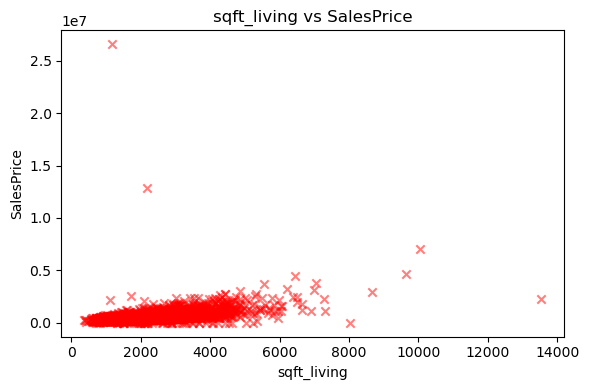

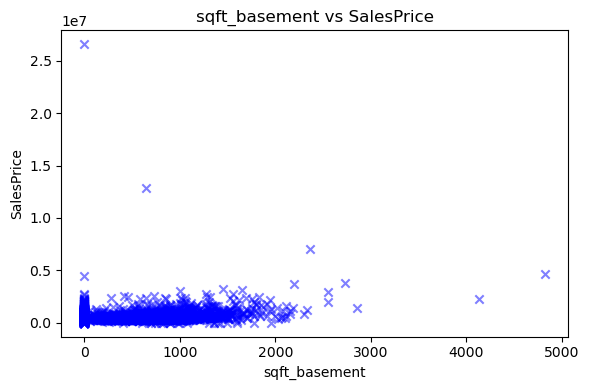

In [61]:
plt.figure(figsize=(6,4))
plt.scatter(df["sqft_living"], df["SalesPrice"],color= "red" , alpha=0.5, marker="x")
plt.xlabel("sqft_living")
plt.ylabel("SalesPrice")
plt.title("sqft_living vs SalesPrice")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df["sqft_basement"], df["SalesPrice"],color= "blue", alpha=0.5, marker="x")
plt.xlabel("sqft_basement")
plt.ylabel("SalesPrice")
plt.title("sqft_basement vs SalesPrice")
plt.tight_layout()
plt.show()

Explaination of the Result: 

-
-
-
-
-
-

Model Evaluation

1. Compare the results and discuss which model between Single and Multi-variable linear
regression is best to predict housing prices. Please provide a reason.

In [62]:
print("Model Evaluation")
print("----------------")
print(f"Single‑variable Linear Regression R²: {r2_manual:.4f}   |  RMSE: {rmse_manual:,.0f}")
print(f"Multi‑variable Linear Regression  R²: {r2_m:.4f}   |  RMSE: {rmse_m:,.0f}")
print(f"\n(ΔR² is only about {r2_m:.4f}-{r2_manual:.4f}  = +0.0004  ⇒ the multivariate model is "
      "not materially better for prediction.)")

Model Evaluation
----------------
Single‑variable Linear Regression R²: 0.1853   |  RMSE: 508,881
Multi‑variable Linear Regression  R²: 0.1857   |  RMSE: 508,755

(ΔR² is only about 0.1857-0.1853  = +0.0004  ⇒ the multivariate model is not materially better for prediction.)


Reason

-
-
-
